In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install transformers

In [ ]:
from transformers import ViTModel, ViTConfig, ViTForImageClassification
import torch
import os

In [ ]:
import torch
from transformers import ViTForImageClassification, ViTFeatureExtractor
from PIL import Image
from torchvision import transforms

In [ ]:
model = ViTForImageClassification.from_pretrained("/content/drive/MyDrive/MYKVASIRV2MODEL/10_2024-03-22-00-08-07/model")


In [ ]:
image_transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize the image to fit the model input size
    transforms.ToTensor(),           # Convert the image to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize the image
])

In [ ]:
!curl -O https://t4.ftcdn.net/jpg/00/86/66/89/360_F_86668945_ig46npav9mjJwUarDMWYKv27S0pN2GNa.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 97106  100 97106    0     0   643k      0 --:--:-- --:--:-- --:--:--  640k


In [ ]:
image_path = "/content/360_F_86668945_ig46npav9mjJwUarDMWYKv27S0pN2GNa.jpg"  # Replace "path_to_test_image.jpg" with the actual path to your test image
image = Image.open(image_path)
image = image_transform(image).unsqueeze(0)  # Add a batch dimension

# Evaluate the model
with torch.no_grad():
    outputs = model(image)

# Get the predicted class
predicted_class = torch.argmax(outputs.logits, dim=1).item()

# Map the predicted class index to the corresponding category
categories = {0: "earthquake", 1: "flood", 2: "wildfire"}

# Print the predicted category
print("Predicted category:", categories[predicted_class])


Predicted category: flood


In [ ]:
!wget https://www.dropbox.com/scl/fi/toycvi2k3h0dz42gl3vk0/test.zip?rlkey=6wjn1yvhcfiuymbhkc2ubcro7&dl=0 # test
!unzip /content/test.zip?rlkey=6wjn1yvhcfiuymbhkc2ubcro7 # test


--2024-03-23 18:49:34--  https://www.dropbox.com/scl/fi/toycvi2k3h0dz42gl3vk0/test.zip?rlkey=6wjn1yvhcfiuymbhkc2ubcro7
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ucc51a506d93a7d8714a23b5e64b.dl.dropboxusercontent.com/cd/0/inline/CPo--qN5hnquKgLl8iM59qbuftLbAO_T-L7HrV6uCOr2C44F-NSbLtepOlX2WCyKFrSSKsZZf66k_dLD1CyrIe1L4WPVqMu_qtkb32WcTy-sYdP5W8c8nOZpCTkHNebGuB-l7bI-KgQQXjuS0wTwzFiE/file# [following]
--2024-03-23 18:49:34--  https://ucc51a506d93a7d8714a23b5e64b.dl.dropboxusercontent.com/cd/0/inline/CPo--qN5hnquKgLl8iM59qbuftLbAO_T-L7HrV6uCOr2C44F-NSbLtepOlX2WCyKFrSSKsZZf66k_dLD1CyrIe1L4WPVqMu_qtkb32WcTy-sYdP5W8c8nOZpCTkHNebGuB-l7bI-KgQQXjuS0wTwzFiE/file
Resolving ucc51a506d93a7d8714a23b5e64b.dl.dropboxusercontent.com (ucc51a506d93a7d8714a23b5e64b.dl.dropboxusercontent.com)... 162.125.65.15, 2620:100:

In [ ]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from sklearn.metrics import accuracy_score
from transformers import ViTForImageClassification, ViTFeatureExtractor

# Define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define data transforms for test dataset
test_transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to fit the model input size
    transforms.ToTensor(),           # Convert images to tensors
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize images
])

# Define test dataset
test_dataset = datasets.ImageFolder(root="/content/test", transform=test_transform)

# Define batch size for testing
batch_size = 64

# Create the test loader
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Define criterion (loss function)
criterion = torch.nn.CrossEntropyLoss()

# Load the pre-trained ViT model
model = ViTForImageClassification.from_pretrained("/content/drive/MyDrive/MYKVASIRV2MODEL/10_2024-03-22-00-08-07/model")
model.to(device)  # Move model to the appropriate device

# Set the model to evaluation mode
model.eval()


ViTForImageClassification(
  (vit): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_features=7

In [ ]:
import torch

def calculate_test_loss(model, test_loader, criterion, device):
    # Set the model to evaluation mode
    model.eval()

    # Initialize variables for loss calculation
    total_loss = 0.0
    num_samples = 0

    # Iterate over the test dataset
    with torch.no_grad():
        for images, labels in test_loader:
            # Move images and labels to the device
            images = images.to(device)
            labels = labels.to(device)

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs.logits, labels)  # Use logits directly for loss calculation

            # Accumulate total loss
            total_loss += loss.item() * images.size(0)
            num_samples += images.size(0)

    # Calculate average test loss
    test_loss = total_loss / num_samples

    return test_loss

# Example usage:
test_loss = calculate_test_loss(model, test_loader, criterion, device)
print(test_loss)

0.10309594055016835


In [ ]:
import torch
from sklearn.metrics import accuracy_score

def calculate_test_accuracy(model, test_loader, device):
    # Set the model to evaluation mode
    model.eval()

    # Initialize lists to store predictions and true labels
    y_true = []
    y_pred = []

    # Iterate over the test dataset
    with torch.no_grad():
        for images, labels in test_loader:
            # Move images and labels to the device
            images = images.to(device)
            labels = labels.to(device)

            # Forward pass
            outputs = model(images)

            # Get predictions
            _, predicted = torch.max(outputs.logits, 1)

            # Append true labels and predicted labels
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())

    # Calculate test accuracy
    test_accuracy = accuracy_score(y_true, y_pred)

    return test_accuracy

# Example usage:
test_accuracy = calculate_test_accuracy(model, test_loader, device)
print(test_accuracy)

0.97


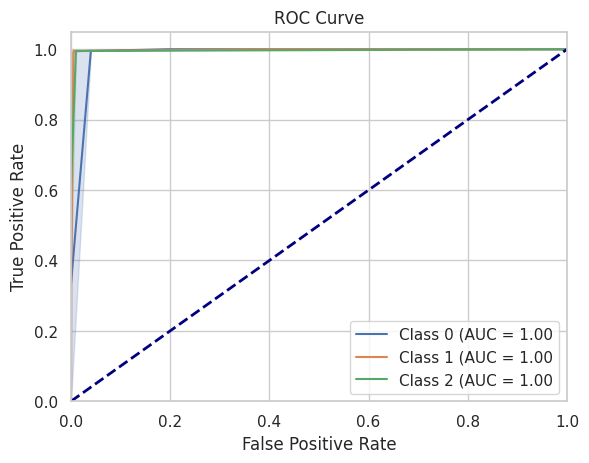

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from torch.utils.data import DataLoader

def calculate_roc_curve(model, test_loader, device):
    # Set the model to evaluation mode
    model.eval()

    # Initialize lists to store predictions and true labels
    y_true = []
    y_probs = []

    # Iterate over the test dataset
    with torch.no_grad():
        for images, labels in test_loader:
            # Move images to the device
            images = images.to(device)

            # Forward pass
            outputs = model(images)

            # Get predicted probabilities
            probabilities = torch.softmax(outputs.logits, dim=1)

            # Append true labels and predicted probabilities
            y_true.extend(labels.cpu().numpy())
            y_probs.extend(probabilities.cpu().numpy())

    # Convert true labels and predicted probabilities to numpy arrays
    y_true = np.array(y_true)
    y_probs = np.array(y_probs)

    # Calculate ROC curve and AUC for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(len(test_loader.dataset.classes)):
        fpr[i], tpr[i], _ = roc_curve(y_true == i, y_probs[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curve for each class using seaborn
    plt.figure()
    sns.set(style='whitegrid')
    for i in range(len(test_loader.dataset.classes)):
        sns.lineplot(x=fpr[i], y=tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f}')

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

# Example usage:
calculate_roc_curve(model, test_loader, device)
